In [3]:
import pandas as pd
import numpy as np 


In [4]:
df = pd.read_csv("./archivos/covid_19_data.csv")
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3390,3391,03/04/2020,NaN,Ukraine,2020-03-03T15:33:02,1.0,0.0,0.0
3391,3392,03/04/2020,From Diamond Princess,Australia,2020-02-29T02:03:10,0.0,0.0,0.0
3392,3393,03/04/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
3393,3394,03/04/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


In [5]:
df["ObservationDate"] = pd.to_datetime(df["ObservationDate"])
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
df.head(10)
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [7]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

acortando el dataframe

In [8]:
df = df[[
 'ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered'
]]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
3390,2020-03-04,Ukraine,1.0,0.0,0.0
3391,2020-03-04,Australia,0.0,0.0,0.0
3392,2020-03-04,US,0.0,0.0,0.0
3393,2020-03-04,US,0.0,0.0,0.0


In [9]:
df_time = df.groupby(["ObservationDate"]).sum()
df_time.head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


diff es la diferencia entre los días

In [10]:
df_time.diff().mean()

Confirmed    2251.642857
Deaths         77.071429
Recovered    1217.690476
dtype: float64

In [11]:
df_diff = df_time.diff()
df_diff.head(10)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


para agregar valor a la primera linea del diff vamos crear un diccionario con la primera linea original la editaremos y la insertaremos en el df_diff

In [12]:
dict= df_time.head(1).to_dict()
dict

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 555.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 28.0}}

In [13]:
df_diff = df_diff.fillna({
'Confirmed': 555.0,
 'Deaths': 17.0,
 'Recovered': 28.0

})


In [14]:
df_diff.head(10)


,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


sumarizado de casos por días

In [15]:
df_diff.cumsum().head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [16]:
df_diff.resample('7D').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5578.0,131.0,107.0
2020-01-29,18314.0,361.0,745.0
2020-02-05,20911.0,621.0,3831.0
2020-02-12,30335.0,894.0,9669.0
2020-02-19,5277.0,701.0,13553.0
2020-02-26,12429.0,452.0,20324.0
2020-03-04,2280.0,94.0,2942.0


In [17]:
df_diff.resample('W-Sun').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,2118.0,56.0,52.0
2020-02-02,14669.0,306.0,420.0
2020-02-09,23364.0,544.0,2772.0
2020-02-16,31075.0,864.0,7621.0
2020-02-23,7759.0,699.0,12529.0
2020-03-01,9386.0,527.0,19322.0
2020-03-08,6753.0,258.0,8455.0


trabajando con nulos

In [18]:
df_diff.resample('12H').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,0.0,0.0,0.0
2020-01-23 00:00:00,98.0,1.0,2.0
2020-01-23 12:00:00,0.0,0.0,0.0
2020-01-24 00:00:00,288.0,8.0,6.0
...,...,...,...
2020-03-02 00:00:00,1938.0,89.0,2886.0
2020-03-02 12:00:00,0.0,0.0,0.0
2020-03-03 00:00:00,2535.0,75.0,2627.0


In [19]:
df_cum = df_time.resample('12H').sum(min_count=1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,NaN,NaN,NaN
2020-03-03 00:00:00,92844.0,3160.0,48229.0


rellenar valor nulo con el valor siguiente

In [20]:
df_cum.bfill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,653.0,18.0,30.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,941.0,26.0,36.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,92844.0,3160.0,48229.0
2020-03-03 00:00:00,92844.0,3160.0,48229.0


rellenar con valor anterior

In [21]:
df_cum.ffill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,555.0,17.0,28.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,653.0,18.0,30.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,90309.0,3085.0,45602.0
2020-03-03 00:00:00,92844.0,3160.0,48229.0


rellenar con valor intermedio   

In [22]:
df_cum= df_cum.interpolate()

Creaqndo tasa de superviviencia "rate"

In [23]:
df_cum["rate"] = 1 - df_cum["Deaths"]/df_cum["Confirmed"]
df_cum

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0,0.965840
2020-03-02 12:00:00,91576.5,3122.5,46915.5,0.965903
2020-03-03 00:00:00,92844.0,3160.0,48229.0,0.965964


In [24]:
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2,2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
3,2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...,...
80,2020-03-02 00:00:00,90309.0,3085.0,45602.0,0.965840
81,2020-03-02 12:00:00,91576.5,3122.5,46915.5,0.965903
82,2020-03-03 00:00:00,92844.0,3160.0,48229.0,0.965964
83,2020-03-03 12:00:00,93984.0,3207.0,49700.0,0.965877


In [32]:
df_cum.groupby(pd.Grouper(key = "ObservationDate", freq=  "M"))[["rate"]].mean()


,rate
ObservationDate,
2020-01-31,0.974594
2020-02-29,0.973562
2020-03-31,0.965920


In [47]:
sr = df_cum.groupby(pd.Grouper(key = "ObservationDate", freq=  "1D"))["rate"].mean()



<AxesSubplot:xlabel='ObservationDate'>

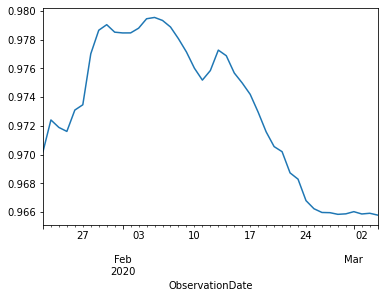

In [39]:
sr.plot()

<AxesSubplot:xlabel='ObservationDate'>

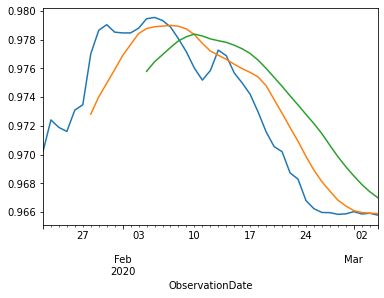

In [51]:
sr.plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=14).mean().plot()

<AxesSubplot:xlabel='ObservationDate'>

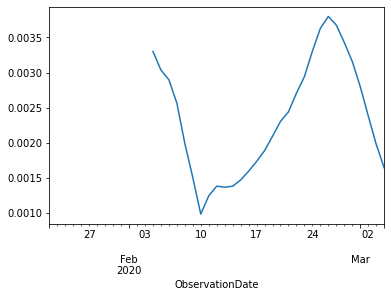

In [55]:
sr.rolling(window=14).apply(lambda x: np.std(x)).plot()

In [56]:
df.groupby("Country/Region")["Confirmed"].max().sort_values(ascending=False)

Country/Region
Mainland China    67332.0
South Korea        5621.0
Italy              3089.0
Iran               2922.0
Others              706.0
                   ...   
Morocco               1.0
Nepal                 1.0
Nigeria               1.0
Latvia                1.0
Colombia              0.0
Name: Confirmed, Length: 90, dtype: float64

In [57]:
df_time = df.groupby(["Country/Region",
            pd.Grouper(key="ObservationDate", freq = "1D")]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region ObservationDate                              
 Azerbaijan    2020-02-28             1.0     0.0        0.0
Afghanistan    2020-02-24             1.0     0.0        0.0
               2020-02-25             1.0     0.0        0.0
               2020-02-26             1.0     0.0        0.0
               2020-02-27             1.0     0.0        0.0
...                                   ...     ...        ...
Vietnam        2020-02-29            16.0     0.0       16.0
               2020-03-01            16.0     0.0       16.0
               2020-03-02            16.0     0.0       16.0
               2020-03-03            16.0     0.0       16.0
               2020-03-04            16.0     0.0       16.0

[1462 rows x 3 columns]

In [58]:
df_china = df_time.loc["Mainland China",:]
df_china.head(10)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0
2020-01-27,2863.0,82.0,58.0
2020-01-28,5494.0,131.0,101.0
2020-01-29,6070.0,133.0,120.0
2020-01-30,8124.0,171.0,135.0


In [63]:
import matplotlib.pyplot as plt

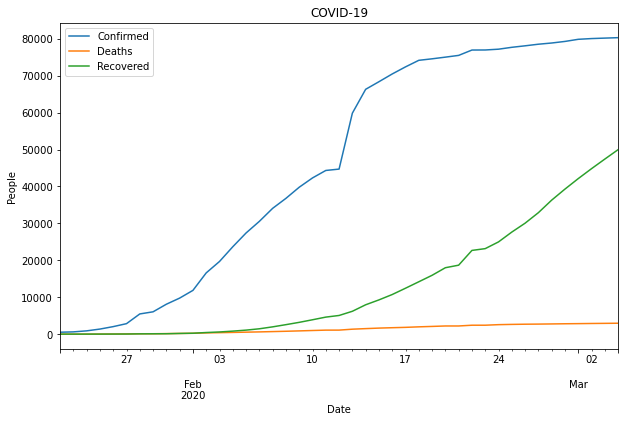

In [69]:
df_china.plot(figsize = (10,6), title = ("COVID-19"))
plt.xlabel("Date")
plt.ylabel("People")
plt.show()